In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Irochka\Downloads\Top_Movies.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [4]:
df.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
title           0
director        0
release_year    0
runtime         0
genre           0
rating          0
metascore       0
gross(M)        0
dtype: int64

In [5]:
#Get rid of Unnamed Columns

df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], axis = 1, inplace = True )

In [6]:
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [7]:
# Get rid of the duplicates in the title column
df.drop_duplicates(subset = "title", inplace = True)

In [8]:
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
3,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
6,Schindler's List,Steven Spielberg,1993,195,Biography,9.0,95,96.90
9,12 Angry Men,Sidney Lumet,1957,96,Crime,9.0,97,4.36


In [9]:
#What is the highest rating in the Movie Set?

df["rating"].max()


9.3

In [10]:
df["rating"].describe()

count    994.000000
mean       7.968913
std        0.276012
min        7.600000
25%        7.800000
50%        7.900000
75%        8.100000
max        9.300000
Name: rating, dtype: float64

In [11]:
# Which 5 movies hold the highest grossing record?

df.sort_values(by='gross(M)', ascending=False).iloc[:5,]

,title,director,release_year,runtime,genre,rating,metascore,gross(M)
1589,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,2015,138,Action,7.8,80,936.66
154,Avengers: Endgame,Anthony Russo,2019,181,Action,8.4,78,858.37
358,Spider-Man: No Way Home,Jon Watts,2021,148,Action,8.2,71,804.75
1179,Avatar,James Cameron,2009,162,Action,7.9,83,760.51
230,Top Gun: Maverick,Joseph Kosinski,2022,130,Action,8.3,78,718.73


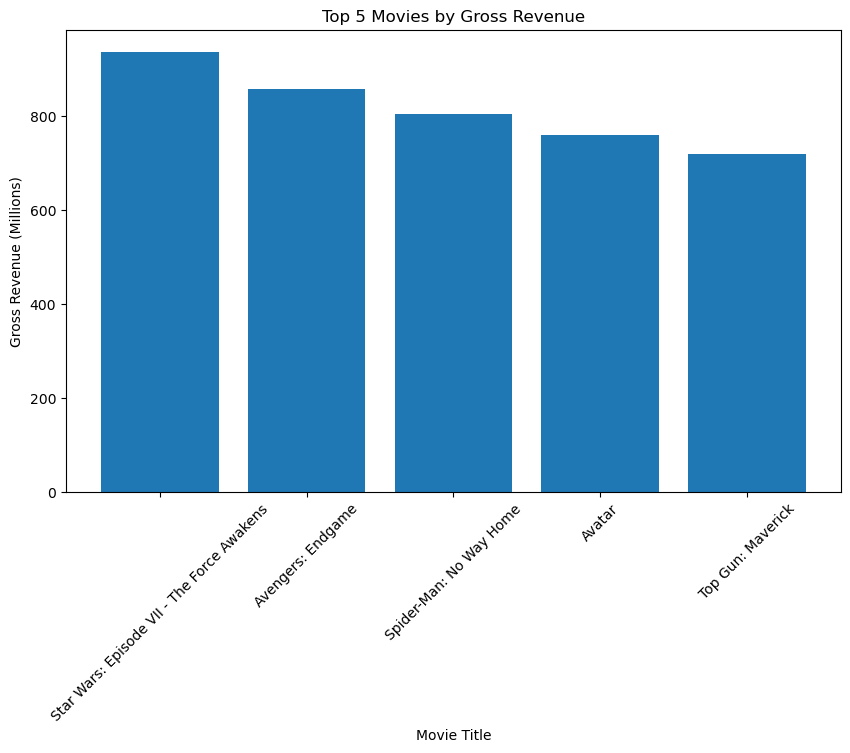

In [12]:
#Plot top 5 Movies reveneue as a bar plot 

sorted_df = df.sort_values(by='gross(M)', ascending=False)
top_5_movies = sorted_df.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_movies['title'], top_5_movies['gross(M)'])
plt.xlabel('Movie Title')
plt.ylabel('Gross Revenue (Millions)')
plt.title('Top 5 Movies by Gross Revenue')
plt.xticks(rotation=45);

In [13]:
#What is the average runtime of a mean

df["runtime"].mean()

124.09154929577464

In [14]:
df.corr()

C:\Users\Irochka\AppData\Local\Temp\ipykernel_2440\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,release_year,runtime,rating,metascore,gross(M)
release_year,1.000000,0.210195,-0.080412,-0.068018,0.243696
runtime,0.210195,1.000000,0.268836,-0.071237,0.139078
rating,-0.080412,0.268836,1.000000,-0.044202,0.083526
metascore,-0.068018,-0.071237,-0.044202,1.000000,0.168442
gross(M),0.243696,0.139078,0.083526,0.168442,1.000000


C:\Users\Irochka\AppData\Local\Temp\ipykernel_2440\790929757.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

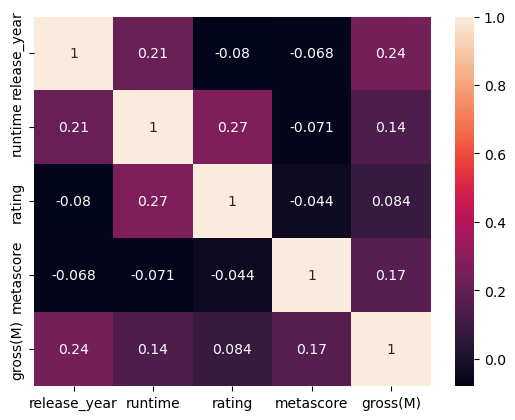

In [15]:
#Plot correlation as a heat map
sns.heatmap(df.corr(), annot = True)

In [16]:
#Get Top 5 movie directors by gross revenue

director_gross = df.groupby('director')['gross(M)'].sum()
sorted_directors = director_gross.sort_values(ascending=False)
top_5_directors = sorted_directors.head(5)
top_5_directors

director
James Cameron        2407.92
Steven Spielberg     2273.73
Anthony Russo        2205.04
Christopher Nolan    1937.45
Peter Jackson        1597.31
Name: gross(M), dtype: float64

In [31]:
# Sort genres by their respective highest gross revenue

top_genres = df.groupby('genre')['gross(M)'].max()
top_genres.sort_values(ascending=False, inplace=True)
# top_genres = genre[:5]
top_genres[:5]

genre
Action       936.66
Drama        659.33
Adventure    435.11
Animation    434.04
Crime        335.45
Name: gross(M), dtype: float64

C:\Users\Irochka\AppData\Local\Temp\ipykernel_2440\851510088.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


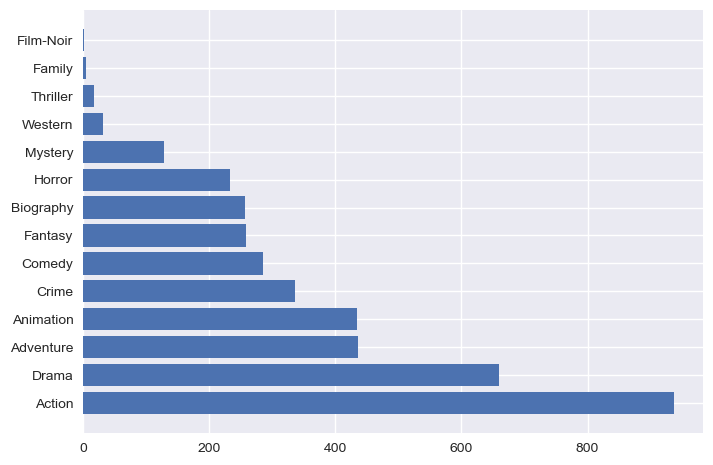

In [32]:
x = top_genres.index
y = top_genres.values
plt.style.use("seaborn")
plt.barh(x, y);